# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [29]:
# import libraries here
import pandas as pd
import matplotlib.pyplot as plt

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`

In [2]:
# your answer here
employee = pd.read_csv('./data/Employee.csv')

In [15]:
employee.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


In [16]:
employee.shape

(9, 7)

#### What's the mean salary by department. 
##### Tip : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [ ]:
# your answer here-1st way
mean_salary_by_dep = employee.groupby('Department')['Salary'].mean()
print(mean_salary_by_dep)


Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64


In [5]:
# your answer here-2nd way
mean_salary_by_dep_pivot = employee.pivot_table(index='Department', values='Salary', aggfunc='mean')
print(mean_salary_by_dep_pivot)

            Salary
Department        
HR           45.00
IT           48.75
Sales        55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title

In [7]:
# your answer here
mean_salary_by_dep_title = employee.pivot_table(index='Department', columns='Title', values='Salary', aggfunc='mean')
print(mean_salary_by_dep_title)


Title         VP  analyst  associate
Department                          
HR          70.0     32.5        NaN
IT          70.0     32.5       60.0
Sales        NaN      NaN       55.0


#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [9]:
# your answer here
mean_salary_by_title_years = employee.pivot_table(index='Title', columns='Years', values='Salary', aggfunc='mean')
print(mean_salary_by_title_years)

Years         1     2     3     4     7     8
Title                                        
VP          NaN   NaN   NaN   NaN   NaN  70.0
analyst    35.0  30.0   NaN  35.0   NaN   NaN
associate   NaN  55.0  55.0   NaN  60.0   NaN


#### We want to know the information about the mean salary and number of employees in each department and for each job title

In [ ]:
# your answer here
# The pivot table shows the average salary for each combination of department and job title.
# It helps to identify which departments and titles have higher or lower average salaries. 
# Additionally, it can reveal disparities in pay across different roles within the same department. 
# The number of employees in each department and title can be inferred from the size of the dataset, 
# but it is not directly shown in this pivot table.


#### We want to know for each department and for each job title the Salary's median,minimum,maximum and standard deviation. Comment your results

In [11]:
# your answer here
mean_salary_stats = employee.pivot_table(index='Department', columns='Title', values='Salary', aggfunc=['median', 'min', 'max', 'std'])
print(mean_salary_stats)

           median                     min                     max          \
Title          VP analyst associate    VP analyst associate    VP analyst   
Department                                                                  
HR           70.0    32.5       NaN  70.0    30.0       NaN  70.0    35.0   
IT           70.0    32.5      60.0  70.0    30.0      60.0  70.0    35.0   
Sales         NaN     NaN      55.0   NaN     NaN      55.0   NaN     NaN   

                           std            
Title      associate   analyst associate  
Department                                
HR               NaN  3.535534       NaN  
IT              60.0  3.535534       NaN  
Sales           55.0       NaN       0.0  


In [12]:
# The pivot table shows the median, minimum, maximum, and standard deviation of salaries for each combination of department and job title.
# It helps to identify which departments and titles have higher or lower salaries, as well as the variability of salaries within each group.
# This information can be useful for understanding pay equity and making informed decisions about compensation.

#### Based on your comments, fill the missing values with an appropriate value

In [13]:
# your answer here
mean_salary_stats_filled = mean_salary_stats.fillna(0)
print(mean_salary_stats_filled)

           median                     min                     max          \
Title          VP analyst associate    VP analyst associate    VP analyst   
Department                                                                  
HR           70.0    32.5       0.0  70.0    30.0       0.0  70.0    35.0   
IT           70.0    32.5      60.0  70.0    30.0      60.0  70.0    35.0   
Sales         0.0     0.0      55.0   0.0     0.0      55.0   0.0     0.0   

                           std            
Title      associate   analyst associate  
Department                                
HR               0.0  3.535534       0.0  
IT              60.0  3.535534       0.0  
Sales           55.0  0.000000       0.0  


#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [17]:
# your answer here
# Assign EmployeeID as the index
employee['EmployeeID'] = employee.index
department_stats = employee.groupby('Department').agg({'EmployeeID': 'count', 'Salary': 'sum'})
print(department_stats)

            EmployeeID  Salary
Department                    
HR                   3     135
IT                   4     195
Sales                2     110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary

In [19]:
# your answer here
# Group by Department and Title, then aggregate
result = employee.groupby(['Department', 'Title']).agg(
    total_years=('Years', 'sum'),
    mean_salary=('Salary', 'mean')
).reset_index()

print(result)

  Department      Title  total_years  mean_salary
0         HR         VP            8         70.0
1         HR    analyst            6         32.5
2         IT         VP            8         70.0
3         IT    analyst            3         32.5
4         IT  associate            7         60.0
5      Sales  associate            5         55.0


#### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table

#### * Hint: Write a custom function*

In [22]:
# your answer here--Your custom function here
def mean_without_max(x):
    if len(x) <= 1:
        return 0
    else:
        return (x.sum() - x.max()) / (len(x) - 1)
        

In [23]:
# your answer here
mean_salary_wo_max = employee.pivot_table(index='Department', values='Salary', aggfunc=mean_without_max)
print(mean_salary_wo_max)

               Salary
Department           
HR          32.500000
IT          41.666667
Sales       55.000000


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`

In [24]:
# your answer here
fitbit = pd.read_csv('./data/Fitbit.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics
#### *Hint: Use Pandas functions from previous lectures*

In [25]:
# your answer here
fitbit.shape

(367, 14)

In [26]:
# your answer here
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    367 non-null    object 
 1   Calorie burned          367 non-null    int64  
 2   Steps                   367 non-null    int64  
 3   Distance                367 non-null    float64
 4   Floors                  367 non-null    int64  
 5   Minutes Sedentary       367 non-null    float64
 6   Minutes Lightly Active  367 non-null    int64  
 7   Minutes Fairly Active   367 non-null    int64  
 8   Minutes Very Active     367 non-null    int64  
 9   Activity Calories       367 non-null    int64  
 10  MinutesOfSleep          367 non-null    int64  
 11  MinutesOfBeingAwake     367 non-null    int64  
 12  NumberOfAwakings        367 non-null    int64  
 13  LengthOfRestInMinutes   367 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory

#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [28]:
# your answer here
min_very_active_steps_corr = fitbit[['Minutes Very Active', 'Steps']].corr().iloc[0, 1]
print(f"Correlation between Minutes Very Active and Steps: {min_very_active_steps_corr}")

Correlation between Minutes Very Active and Steps: 0.5714518481062607


#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

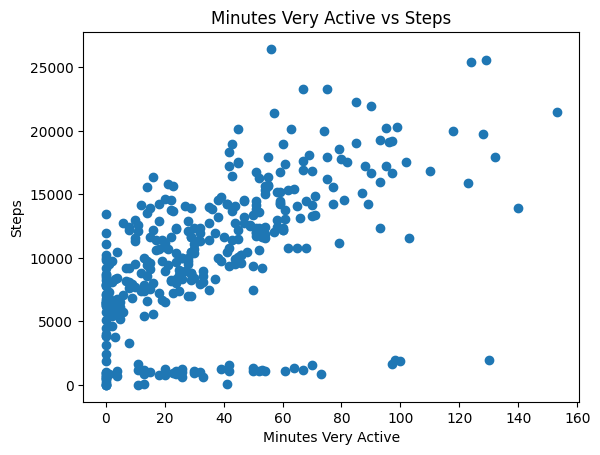

In [30]:
# your answer here

plt.scatter(x=fitbit['Minutes Very Active'], y=fitbit['Steps'])
plt.title('Minutes Very Active vs Steps')
plt.xlabel('Minutes Very Active')
plt.ylabel('Steps')
plt.show()

#### What can you say about Minute Very Active and Steps? Write a comment below

In [31]:
# your comment here
# There is a strong positive correlation between Minutes Very Active and Steps, indicating that as the number
# of minutes spent being very active increases, the number of steps taken also tends to increase.

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [32]:
# your answer here
min_sedentary_steps_corr = fitbit[['Minutes Sedentary', 'Steps']].corr().iloc[0, 1]
print(f"Correlation between Minutes Sedentary and Steps: {min_sedentary_steps_corr}")

Correlation between Minutes Sedentary and Steps: 0.0769060806299009


#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

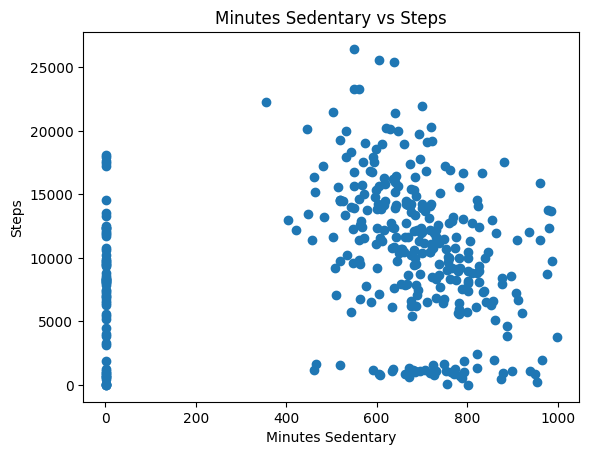

In [33]:
# your answer here
plt.scatter(x=fitbit['Minutes Sedentary'], y=fitbit['Steps'])
plt.title('Minutes Sedentary vs Steps')
plt.xlabel('Minutes Sedentary')
plt.ylabel('Steps')
plt.show()

In [34]:
# Your comment here
# There is a weak negative correlation between Minutes Sedentary and Steps, suggesting that as the
# number of minutes spent being sedentary increases, the number of steps taken tends to decrease.

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [36]:
# your answer here
min_sleep_steps_corr = fitbit[['MinutesOfSleep', 'Steps']].corr().iloc[0, 1]
print(f"Correlation between Minutes of Sleep and Steps: {min_sleep_steps_corr}")

Correlation between Minutes of Sleep and Steps: 0.1309856595083636


#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

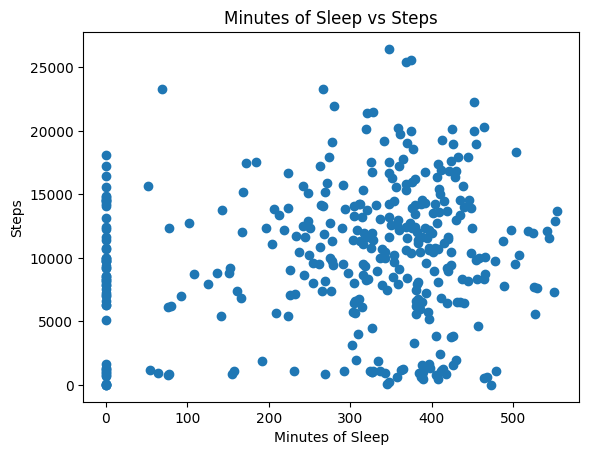

In [38]:
# your answer here
plt.scatter(x=fitbit['MinutesOfSleep'], y=fitbit['Steps'])
plt.title('Minutes of Sleep vs Steps')
plt.xlabel('Minutes of Sleep')
plt.ylabel('Steps')
plt.show()

In [39]:
# There is a weak positive correlation between Minutes of Sleep and Steps, suggesting that as the
# number of minutes spent sleeping increases, the number of steps taken also tends to increase.


#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [40]:
# your answer here
columns= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']
cor_fit = fitbit[columns].corr()

In [41]:
#Print cor_fit
print(cor_fit)

                     Calorie burned     Steps    Floors  Minutes Sedentary  \
Calorie burned             1.000000  0.255305  0.130757           0.125353   
Steps                      0.255305  1.000000  0.306511           0.076906   
Floors                     0.130757  0.306511  1.000000           0.057812   
Minutes Sedentary          0.125353  0.076906  0.057812           1.000000   
Minutes Very Active        0.197881  0.571452  0.399503           0.105963   
MinutesOfSleep             0.011485  0.130986  0.069464           0.204242   

                     Minutes Very Active  MinutesOfSleep  
Calorie burned                  0.197881        0.011485  
Steps                           0.571452        0.130986  
Floors                          0.399503        0.069464  
Minutes Sedentary               0.105963        0.204242  
Minutes Very Active             1.000000        0.108018  
MinutesOfSleep                  0.108018        1.000000  


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [42]:
# your answer here
highly_correlated_with_steps = cor_fit['Steps'].sort_values(ascending=False)
print(highly_correlated_with_steps)

Steps                  1.000000
Minutes Very Active    0.571452
Floors                 0.306511
Calorie burned         0.255305
MinutesOfSleep         0.130986
Minutes Sedentary      0.076906
Name: Steps, dtype: float64


# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`

In [45]:
# your answer here
time_grades = pd.read_csv('./data/Time_Grades.csv')

In [44]:
#Print time_grades
print(time_grades)

        Name  Study time  Grade
0       Jose           4      4
1      Maria           9      7
2      David           8      9
3      Sonia          10      7
4     Samuel          20      9
5        Eva           5      3
6     Carlos          12      7
7      Pedro           6      5
8        Ana          18      9
9   Gervasio           7      3
10     Gemma           7      8
11    Alicia          11      7
12  Jonathan           2      1
13  Cristina          13      8
14     Pilar           3      2


In [ ]:
time_grades.columns = ['name', 'study_time', 'grade']

#### Show visually the frequency distribution of the time_grades dataset.

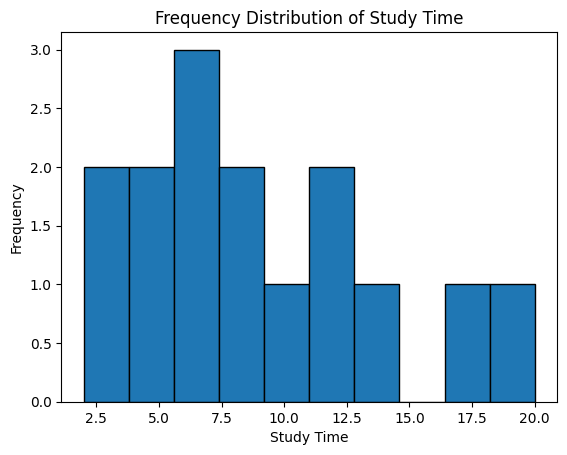

In [49]:
# your answer here
plt.hist(time_grades['study_time'], bins=10, edgecolor='black')
plt.title('Frequency Distribution of Study Time')
plt.xlabel('Study Time')
plt.ylabel('Frequency')
plt.show()

#### Is there a correaltion between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [50]:
# your answer here-Pearson 
pearson_corr = time_grades['study_time'].corr(time_grades['grade'], method='pearson')
spearman_corr = time_grades['study_time'].corr(time_grades['grade'], method='spearman')

print(f"Pearson correlation: {pearson_corr}")
print(f"Spearman correlation: {spearman_corr}")


Pearson correlation: 0.7980456073578858
Spearman correlation: 0.819658753036942


In [ ]:
## your answer here-Spearman
# There is a moderate positive correlation between study time and grades, indicating that as study time increases, grades tend to improve.

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

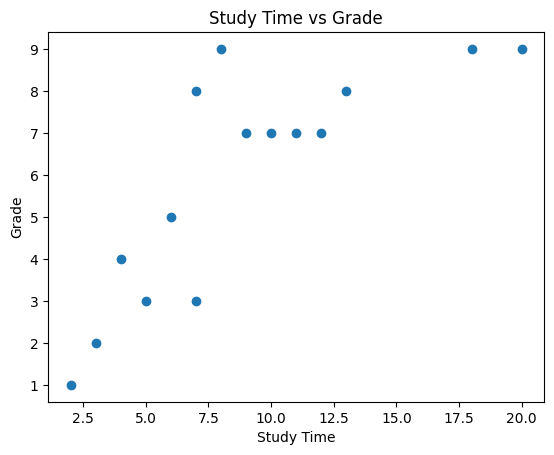

In [51]:
# your answer here
plt.scatter(time_grades['study_time'], time_grades['grade'])
plt.title('Study Time vs Grade')
plt.xlabel('Study Time')
plt.ylabel('Grade')
plt.show()

In [ ]:
# your comment here
# The scatter plot shows a positive relationship between study time and grades, 
# which is consistent with the correlation coefficients calculated earlier.


#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [52]:
#your comment here
# Pearson correlation measures the linear relationship between two continuous variables, assuming a normal distribution.
# Spearman correlation, on the other hand, is a non-parametric measure that assesses the monotonic relationship between two variables,
# based on the ranks of the data rather than their actual values.